In [3]:
# Data preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('Santander_data/train.csv', encoding='latin-1')
print('dataset_shape:', cust_df.shape)
cust_df.head(3)

dataset_shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [9]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()
print('unsatisfied customer ratio: {0:.2f}'.format(unsatisfied_cnt/total_cnt))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied customer ratio: 0.04


In [10]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [13]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 218           1
 215           1
 151           1
 87            1
 191           1
Name: var3, Length: 208, dtype: int64

In [14]:
# var3 value replace and ID feature drop
cust_df['var3'] = cust_df['var3'].replace(-999999, 2)
cust_df = cust_df.drop('ID', axis=1)

# feature label split
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('feature data shape:{0}'.format(X_features.shape))

feature data shape:(76020, 369)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, stratify=y_labels)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('learning set shape:{0}, test set shape:{1}'.format(X_train.shape, X_test.shape))
print('label distribution in training set')
print(y_train.value_counts()/train_cnt)
print('\nlabel distribution in testing set')
print(y_test.value_counts()/test_cnt)

learning set shape:(60816, 369), test set shape:(15204, 369)
label distribution in training set
0    0.960438
1    0.039562
Name: TARGET, dtype: float64

label distribution in testing set
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
xgb_clf = XGBClassifier(n_estimators=500)

# metrics : roc_auc_score, early_stopping_rounds = 100
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric = 'auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81899	validation_1-auc:0.79574
[1]	validation_0-auc:0.83530	validation_1-auc:0.81215
[2]	validation_0-auc:0.84331	validation_1-auc:0.81704
[3]	validation_0-auc:0.84622	validation_1-auc:0.82111
[4]	validation_0-auc:0.84921	validation_1-auc:0.82088
[5]	validation_0-auc:0.85467	validation_1-auc:0.82146
[6]	validation_0-auc:0.85772	validation_1-auc:0.82232
[7]	validation_0-auc:0.86079	validation_1-auc:0.82383
[8]	validation_0-auc:0.86435	validation_1-auc:0.82464
[9]	validation_0-auc:0.86725	validation_1-auc:0.82570
[10]	validation_0-auc:0.86982	validation_1-auc:0.82744
[11]	validation_0-auc:0.87214	validation_1-auc:0.82902
[12]	validation_0-auc:0.87429	validation_1-auc:0.82838
[13]	validation_0-auc:0.87682	validation_1-auc:0.82821
[14]	validation_0-auc:0.87961	validation_1-auc:0.82859
[15]	validation_0-auc:0.88170	validation_1-auc:0.82947
[16]	validation_0-auc:0.88405	validation_1-auc:0.82964
[17]	validation_0-auc:0.88592	validation_1-auc:0.82947
[18]	validation_0-au

In [26]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# in order to search fast, decrease n_estimators to 100
xgb_clf = XGBClassifier(n_estimators=100, n_jobs=-1)
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}
# cv = 3
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_train, y_train), (X_test, y_test)])
print('Best parameters:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80331	validation_1-auc:0.78602
[1]	validation_0-auc:0.82242	validation_1-auc:0.80682
[2]	validation_0-auc:0.83055	validation_1-auc:0.81624
[3]	validation_0-auc:0.83364	validation_1-auc:0.81790
[4]	validation_0-auc:0.83763	validation_1-auc:0.81894
[5]	validation_0-auc:0.84041	validation_1-auc:0.82074
[6]	validation_0-auc:0.83893	validation_1-auc:0.81887
[7]	validation_0-auc:0.84591	validation_1-auc:0.82126
[8]	validation_0-auc:0.85067	validation_1-auc:0.82548
[9]	validation_0-auc:0.84992	validation_1-auc:0.82403
[10]	validation_0-auc:0.85069	validation_1-auc:0.82214
[11]	validation_0-auc:0.84976	validation_1-auc:0.82140
[12]	validation_0-auc:0.85546	validation_1-auc:0.82715
[13]	validation_0-auc:0.85879	validation_1-auc:0.82832
[14]	validation_0-auc:0.86064	validation_1-auc:0.82848
[15]	validation_0-auc:0.86199	validation_1-auc:0.82849
[16]	validation_0-auc:0.86321	validation_1-auc:0.83044
[17]	validation_0-auc:0.86523	validation_1-auc:0.83095
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81218	validation_1-auc:0.79339
[1]	validation_0-auc:0.82987	validation_1-auc:0.80908
[2]	validation_0-auc:0.83145	validation_1-auc:0.80802
[3]	validation_0-auc:0.83312	validation_1-auc:0.81087
[4]	validation_0-auc:0.83599	validation_1-auc:0.81014
[5]	validation_0-auc:0.83892	validation_1-auc:0.81673
[6]	validation_0-auc:0.84085	validation_1-auc:0.81784
[7]	validation_0-auc:0.84773	validation_1-auc:0.82112
[8]	validation_0-auc:0.85072	validation_1-auc:0.82100
[9]	validation_0-auc:0.85259	validation_1-auc:0.82168
[10]	validation_0-auc:0.85206	validation_1-auc:0.81954
[11]	validation_0-auc:0.85227	validation_1-auc:0.82092
[12]	validation_0-auc:0.85808	validation_1-auc:0.82737
[13]	validation_0-auc:0.86082	validation_1-auc:0.82967
[14]	validation_0-auc:0.86232	validation_1-auc:0.83047
[15]	validation_0-auc:0.86336	validation_1-auc:0.83099
[16]	validation_0-auc:0.86473	validation_1-auc:0.83216
[17]	validation_0-auc:0.86615	validation_1-auc:0.83123
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80697	validation_1-auc:0.78446
[1]	validation_0-auc:0.81699	validation_1-auc:0.79675
[2]	validation_0-auc:0.82630	validation_1-auc:0.80458
[3]	validation_0-auc:0.83138	validation_1-auc:0.81164
[4]	validation_0-auc:0.83646	validation_1-auc:0.81378
[5]	validation_0-auc:0.83728	validation_1-auc:0.81610
[6]	validation_0-auc:0.83761	validation_1-auc:0.81349
[7]	validation_0-auc:0.84356	validation_1-auc:0.81855
[8]	validation_0-auc:0.84745	validation_1-auc:0.81986
[9]	validation_0-auc:0.84752	validation_1-auc:0.81972
[10]	validation_0-auc:0.84750	validation_1-auc:0.81949
[11]	validation_0-auc:0.84703	validation_1-auc:0.81704
[12]	validation_0-auc:0.85320	validation_1-auc:0.82296
[13]	validation_0-auc:0.85797	validation_1-auc:0.82621
[14]	validation_0-auc:0.86083	validation_1-auc:0.82849
[15]	validation_0-auc:0.86199	validation_1-auc:0.82720
[16]	validation_0-auc:0.86383	validation_1-auc:0.83004
[17]	validation_0-auc:0.86506	validation_1-auc:0.83065
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80290	validation_1-auc:0.78642
[1]	validation_0-auc:0.82162	validation_1-auc:0.80891
[2]	validation_0-auc:0.83145	validation_1-auc:0.81732
[3]	validation_0-auc:0.83464	validation_1-auc:0.82207
[4]	validation_0-auc:0.83876	validation_1-auc:0.82199
[5]	validation_0-auc:0.84119	validation_1-auc:0.82321
[6]	validation_0-auc:0.83987	validation_1-auc:0.82076
[7]	validation_0-auc:0.84645	validation_1-auc:0.82411
[8]	validation_0-auc:0.85035	validation_1-auc:0.82742
[9]	validation_0-auc:0.84949	validation_1-auc:0.82461
[10]	validation_0-auc:0.85003	validation_1-auc:0.82280
[11]	validation_0-auc:0.84874	validation_1-auc:0.82160
[12]	validation_0-auc:0.85463	validation_1-auc:0.82708
[13]	validation_0-auc:0.85795	validation_1-auc:0.82792
[14]	validation_0-auc:0.85942	validation_1-auc:0.82814
[15]	validation_0-auc:0.86019	validation_1-auc:0.82690
[16]	validation_0-auc:0.86138	validation_1-auc:0.82829
[17]	validation_0-auc:0.86290	validation_1-auc:0.82922
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81022	validation_1-auc:0.79414
[1]	validation_0-auc:0.82731	validation_1-auc:0.81004
[2]	validation_0-auc:0.83152	validation_1-auc:0.81211
[3]	validation_0-auc:0.83337	validation_1-auc:0.81464
[4]	validation_0-auc:0.83708	validation_1-auc:0.81375
[5]	validation_0-auc:0.84225	validation_1-auc:0.81979
[6]	validation_0-auc:0.84094	validation_1-auc:0.81928
[7]	validation_0-auc:0.84698	validation_1-auc:0.82198
[8]	validation_0-auc:0.85123	validation_1-auc:0.82589
[9]	validation_0-auc:0.85235	validation_1-auc:0.82634
[10]	validation_0-auc:0.85155	validation_1-auc:0.82410
[11]	validation_0-auc:0.85069	validation_1-auc:0.82300
[12]	validation_0-auc:0.85555	validation_1-auc:0.82630
[13]	validation_0-auc:0.85856	validation_1-auc:0.82908
[14]	validation_0-auc:0.86044	validation_1-auc:0.82984
[15]	validation_0-auc:0.86152	validation_1-auc:0.83039
[16]	validation_0-auc:0.86250	validation_1-auc:0.83145
[17]	validation_0-auc:0.86311	validation_1-auc:0.83172
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80664	validation_1-auc:0.78464
[1]	validation_0-auc:0.82079	validation_1-auc:0.80195
[2]	validation_0-auc:0.82406	validation_1-auc:0.80257
[3]	validation_0-auc:0.83154	validation_1-auc:0.81459
[4]	validation_0-auc:0.83657	validation_1-auc:0.81661
[5]	validation_0-auc:0.83729	validation_1-auc:0.81842
[6]	validation_0-auc:0.83680	validation_1-auc:0.81512
[7]	validation_0-auc:0.84326	validation_1-auc:0.81920
[8]	validation_0-auc:0.84678	validation_1-auc:0.82128
[9]	validation_0-auc:0.84584	validation_1-auc:0.82110
[10]	validation_0-auc:0.84602	validation_1-auc:0.82019
[11]	validation_0-auc:0.84509	validation_1-auc:0.81761
[12]	validation_0-auc:0.85112	validation_1-auc:0.82217
[13]	validation_0-auc:0.85517	validation_1-auc:0.82522
[14]	validation_0-auc:0.85742	validation_1-auc:0.82670
[15]	validation_0-auc:0.85838	validation_1-auc:0.82659
[16]	validation_0-auc:0.86021	validation_1-auc:0.82854
[17]	validation_0-auc:0.86178	validation_1-auc:0.82948
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81842	validation_1-auc:0.79447
[1]	validation_0-auc:0.83164	validation_1-auc:0.81063
[2]	validation_0-auc:0.84098	validation_1-auc:0.81851
[3]	validation_0-auc:0.84324	validation_1-auc:0.82149
[4]	validation_0-auc:0.84730	validation_1-auc:0.82302
[5]	validation_0-auc:0.84929	validation_1-auc:0.82199
[6]	validation_0-auc:0.85118	validation_1-auc:0.82081
[7]	validation_0-auc:0.86025	validation_1-auc:0.82637
[8]	validation_0-auc:0.86443	validation_1-auc:0.83088
[9]	validation_0-auc:0.86636	validation_1-auc:0.82795
[10]	validation_0-auc:0.86619	validation_1-auc:0.82455
[11]	validation_0-auc:0.86564	validation_1-auc:0.82136
[12]	validation_0-auc:0.87157	validation_1-auc:0.82622
[13]	validation_0-auc:0.87628	validation_1-auc:0.82894
[14]	validation_0-auc:0.87774	validation_1-auc:0.82980
[15]	validation_0-auc:0.87931	validation_1-auc:0.82856
[16]	validation_0-auc:0.88101	validation_1-auc:0.83007
[17]	validation_0-auc:0.88455	validation_1-auc:0.82916
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81875	validation_1-auc:0.79767
[1]	validation_0-auc:0.83661	validation_1-auc:0.81183
[2]	validation_0-auc:0.83973	validation_1-auc:0.81459
[3]	validation_0-auc:0.84330	validation_1-auc:0.81657
[4]	validation_0-auc:0.84835	validation_1-auc:0.81769
[5]	validation_0-auc:0.85202	validation_1-auc:0.82064
[6]	validation_0-auc:0.85208	validation_1-auc:0.82270
[7]	validation_0-auc:0.86135	validation_1-auc:0.82505
[8]	validation_0-auc:0.86517	validation_1-auc:0.82437
[9]	validation_0-auc:0.86788	validation_1-auc:0.82314
[10]	validation_0-auc:0.86901	validation_1-auc:0.82160
[11]	validation_0-auc:0.86881	validation_1-auc:0.82000
[12]	validation_0-auc:0.87415	validation_1-auc:0.82530
[13]	validation_0-auc:0.87850	validation_1-auc:0.82676
[14]	validation_0-auc:0.88011	validation_1-auc:0.82788
[15]	validation_0-auc:0.88158	validation_1-auc:0.82926
[16]	validation_0-auc:0.88269	validation_1-auc:0.83049
[17]	validation_0-auc:0.88351	validation_1-auc:0.82898
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81260	validation_1-auc:0.78777
[1]	validation_0-auc:0.82994	validation_1-auc:0.80417
[2]	validation_0-auc:0.83348	validation_1-auc:0.80867
[3]	validation_0-auc:0.84081	validation_1-auc:0.81607
[4]	validation_0-auc:0.84655	validation_1-auc:0.81828
[5]	validation_0-auc:0.84798	validation_1-auc:0.82032
[6]	validation_0-auc:0.84762	validation_1-auc:0.81893
[7]	validation_0-auc:0.85514	validation_1-auc:0.81977
[8]	validation_0-auc:0.85951	validation_1-auc:0.82024
[9]	validation_0-auc:0.86097	validation_1-auc:0.81894
[10]	validation_0-auc:0.86255	validation_1-auc:0.81690
[11]	validation_0-auc:0.86335	validation_1-auc:0.81752
[12]	validation_0-auc:0.87081	validation_1-auc:0.82198
[13]	validation_0-auc:0.87579	validation_1-auc:0.82540
[14]	validation_0-auc:0.87766	validation_1-auc:0.82612
[15]	validation_0-auc:0.87941	validation_1-auc:0.82684
[16]	validation_0-auc:0.88153	validation_1-auc:0.82725
[17]	validation_0-auc:0.88381	validation_1-auc:0.82785
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81766	validation_1-auc:0.79489
[1]	validation_0-auc:0.83084	validation_1-auc:0.81126
[2]	validation_0-auc:0.83832	validation_1-auc:0.81642
[3]	validation_0-auc:0.84094	validation_1-auc:0.82069
[4]	validation_0-auc:0.84647	validation_1-auc:0.82325
[5]	validation_0-auc:0.84827	validation_1-auc:0.81927
[6]	validation_0-auc:0.84863	validation_1-auc:0.82025
[7]	validation_0-auc:0.85808	validation_1-auc:0.82638
[8]	validation_0-auc:0.86226	validation_1-auc:0.82753
[9]	validation_0-auc:0.86320	validation_1-auc:0.82691
[10]	validation_0-auc:0.86290	validation_1-auc:0.82317
[11]	validation_0-auc:0.86275	validation_1-auc:0.82162
[12]	validation_0-auc:0.86867	validation_1-auc:0.82557
[13]	validation_0-auc:0.87253	validation_1-auc:0.82676
[14]	validation_0-auc:0.87406	validation_1-auc:0.82732
[15]	validation_0-auc:0.87474	validation_1-auc:0.82560
[16]	validation_0-auc:0.87635	validation_1-auc:0.82846
[17]	validation_0-auc:0.87895	validation_1-auc:0.82909
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81520	validation_1-auc:0.79732
[1]	validation_0-auc:0.83402	validation_1-auc:0.81302
[2]	validation_0-auc:0.83881	validation_1-auc:0.81317
[3]	validation_0-auc:0.83937	validation_1-auc:0.81451
[4]	validation_0-auc:0.84592	validation_1-auc:0.81679
[5]	validation_0-auc:0.85073	validation_1-auc:0.82013
[6]	validation_0-auc:0.84892	validation_1-auc:0.82266
[7]	validation_0-auc:0.85805	validation_1-auc:0.82870
[8]	validation_0-auc:0.86298	validation_1-auc:0.82680
[9]	validation_0-auc:0.86419	validation_1-auc:0.82652
[10]	validation_0-auc:0.86473	validation_1-auc:0.82479
[11]	validation_0-auc:0.86450	validation_1-auc:0.82212
[12]	validation_0-auc:0.87049	validation_1-auc:0.82607
[13]	validation_0-auc:0.87368	validation_1-auc:0.82828
[14]	validation_0-auc:0.87476	validation_1-auc:0.82769
[15]	validation_0-auc:0.87560	validation_1-auc:0.82782
[16]	validation_0-auc:0.87657	validation_1-auc:0.82771
[17]	validation_0-auc:0.87809	validation_1-auc:0.82896
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81109	validation_1-auc:0.78867
[1]	validation_0-auc:0.82896	validation_1-auc:0.80581
[2]	validation_0-auc:0.83296	validation_1-auc:0.80786
[3]	validation_0-auc:0.84083	validation_1-auc:0.81697
[4]	validation_0-auc:0.84811	validation_1-auc:0.81957
[5]	validation_0-auc:0.84932	validation_1-auc:0.82123
[6]	validation_0-auc:0.84949	validation_1-auc:0.82359
[7]	validation_0-auc:0.85578	validation_1-auc:0.82451
[8]	validation_0-auc:0.86038	validation_1-auc:0.82458
[9]	validation_0-auc:0.86057	validation_1-auc:0.82578
[10]	validation_0-auc:0.86001	validation_1-auc:0.82357
[11]	validation_0-auc:0.86075	validation_1-auc:0.82203
[12]	validation_0-auc:0.86761	validation_1-auc:0.82476
[13]	validation_0-auc:0.87227	validation_1-auc:0.82762
[14]	validation_0-auc:0.87469	validation_1-auc:0.82785
[15]	validation_0-auc:0.87610	validation_1-auc:0.82586
[16]	validation_0-auc:0.87794	validation_1-auc:0.82673
[17]	validation_0-auc:0.87986	validation_1-auc:0.82703
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81882	validation_1-auc:0.80460
[1]	validation_0-auc:0.82446	validation_1-auc:0.81046
[2]	validation_0-auc:0.83180	validation_1-auc:0.81483
[3]	validation_0-auc:0.83521	validation_1-auc:0.81901
[4]	validation_0-auc:0.83797	validation_1-auc:0.81889
[5]	validation_0-auc:0.84020	validation_1-auc:0.82125
[6]	validation_0-auc:0.84678	validation_1-auc:0.82252
[7]	validation_0-auc:0.84837	validation_1-auc:0.82338
[8]	validation_0-auc:0.85040	validation_1-auc:0.82437
[9]	validation_0-auc:0.85198	validation_1-auc:0.82721
[10]	validation_0-auc:0.85282	validation_1-auc:0.82722
[11]	validation_0-auc:0.85240	validation_1-auc:0.82779
[12]	validation_0-auc:0.85720	validation_1-auc:0.83102
[13]	validation_0-auc:0.86002	validation_1-auc:0.83139
[14]	validation_0-auc:0.86118	validation_1-auc:0.83183
[15]	validation_0-auc:0.86268	validation_1-auc:0.83228
[16]	validation_0-auc:0.86338	validation_1-auc:0.83244
[17]	validation_0-auc:0.86410	validation_1-auc:0.83164
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81134	validation_1-auc:0.79744
[1]	validation_0-auc:0.82869	validation_1-auc:0.80969
[2]	validation_0-auc:0.83205	validation_1-auc:0.81384
[3]	validation_0-auc:0.83282	validation_1-auc:0.81365
[4]	validation_0-auc:0.83688	validation_1-auc:0.81709
[5]	validation_0-auc:0.83977	validation_1-auc:0.81601
[6]	validation_0-auc:0.84483	validation_1-auc:0.81806
[7]	validation_0-auc:0.84655	validation_1-auc:0.81928
[8]	validation_0-auc:0.84852	validation_1-auc:0.82101
[9]	validation_0-auc:0.85276	validation_1-auc:0.82523
[10]	validation_0-auc:0.85459	validation_1-auc:0.82624
[11]	validation_0-auc:0.85414	validation_1-auc:0.82548
[12]	validation_0-auc:0.85819	validation_1-auc:0.82734
[13]	validation_0-auc:0.85957	validation_1-auc:0.82844
[14]	validation_0-auc:0.86108	validation_1-auc:0.82919
[15]	validation_0-auc:0.86232	validation_1-auc:0.82906
[16]	validation_0-auc:0.86355	validation_1-auc:0.82901
[17]	validation_0-auc:0.86477	validation_1-auc:0.83004
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80783	validation_1-auc:0.78601
[1]	validation_0-auc:0.81662	validation_1-auc:0.79414
[2]	validation_0-auc:0.82670	validation_1-auc:0.80396
[3]	validation_0-auc:0.82808	validation_1-auc:0.80449
[4]	validation_0-auc:0.83478	validation_1-auc:0.80845
[5]	validation_0-auc:0.83729	validation_1-auc:0.81354
[6]	validation_0-auc:0.84147	validation_1-auc:0.81432
[7]	validation_0-auc:0.84561	validation_1-auc:0.81945
[8]	validation_0-auc:0.84793	validation_1-auc:0.82000
[9]	validation_0-auc:0.85061	validation_1-auc:0.82192
[10]	validation_0-auc:0.85078	validation_1-auc:0.82136
[11]	validation_0-auc:0.85136	validation_1-auc:0.82058
[12]	validation_0-auc:0.85626	validation_1-auc:0.82354
[13]	validation_0-auc:0.85955	validation_1-auc:0.82556
[14]	validation_0-auc:0.86174	validation_1-auc:0.82832
[15]	validation_0-auc:0.86382	validation_1-auc:0.82871
[16]	validation_0-auc:0.86525	validation_1-auc:0.82960
[17]	validation_0-auc:0.86655	validation_1-auc:0.83006
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81787	validation_1-auc:0.80439
[1]	validation_0-auc:0.82355	validation_1-auc:0.80920
[2]	validation_0-auc:0.83220	validation_1-auc:0.81488
[3]	validation_0-auc:0.83672	validation_1-auc:0.82186
[4]	validation_0-auc:0.84020	validation_1-auc:0.82215
[5]	validation_0-auc:0.84212	validation_1-auc:0.82348
[6]	validation_0-auc:0.84716	validation_1-auc:0.82408
[7]	validation_0-auc:0.84819	validation_1-auc:0.82361
[8]	validation_0-auc:0.85103	validation_1-auc:0.82498
[9]	validation_0-auc:0.85189	validation_1-auc:0.82766
[10]	validation_0-auc:0.85286	validation_1-auc:0.82753
[11]	validation_0-auc:0.85337	validation_1-auc:0.82671
[12]	validation_0-auc:0.85665	validation_1-auc:0.82964
[13]	validation_0-auc:0.85888	validation_1-auc:0.83067
[14]	validation_0-auc:0.86002	validation_1-auc:0.83194
[15]	validation_0-auc:0.86114	validation_1-auc:0.83277
[16]	validation_0-auc:0.86213	validation_1-auc:0.83246
[17]	validation_0-auc:0.86294	validation_1-auc:0.83291
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81929	validation_1-auc:0.80104
[1]	validation_0-auc:0.82746	validation_1-auc:0.80973
[2]	validation_0-auc:0.83061	validation_1-auc:0.80990
[3]	validation_0-auc:0.83347	validation_1-auc:0.81327
[4]	validation_0-auc:0.83583	validation_1-auc:0.81341
[5]	validation_0-auc:0.83884	validation_1-auc:0.81545
[6]	validation_0-auc:0.84497	validation_1-auc:0.81930
[7]	validation_0-auc:0.84594	validation_1-auc:0.82227
[8]	validation_0-auc:0.84724	validation_1-auc:0.82221
[9]	validation_0-auc:0.85220	validation_1-auc:0.82586
[10]	validation_0-auc:0.85425	validation_1-auc:0.82575
[11]	validation_0-auc:0.85372	validation_1-auc:0.82660
[12]	validation_0-auc:0.85724	validation_1-auc:0.82925
[13]	validation_0-auc:0.85900	validation_1-auc:0.83067
[14]	validation_0-auc:0.85973	validation_1-auc:0.83231
[15]	validation_0-auc:0.86071	validation_1-auc:0.83202
[16]	validation_0-auc:0.86172	validation_1-auc:0.83257
[17]	validation_0-auc:0.86223	validation_1-auc:0.83277
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80751	validation_1-auc:0.78638
[1]	validation_0-auc:0.82209	validation_1-auc:0.80191
[2]	validation_0-auc:0.82490	validation_1-auc:0.80443
[3]	validation_0-auc:0.83099	validation_1-auc:0.81086
[4]	validation_0-auc:0.83628	validation_1-auc:0.81257
[5]	validation_0-auc:0.83858	validation_1-auc:0.81736
[6]	validation_0-auc:0.84246	validation_1-auc:0.81906
[7]	validation_0-auc:0.84614	validation_1-auc:0.81877
[8]	validation_0-auc:0.84694	validation_1-auc:0.82007
[9]	validation_0-auc:0.85015	validation_1-auc:0.82285
[10]	validation_0-auc:0.84940	validation_1-auc:0.82212
[11]	validation_0-auc:0.84978	validation_1-auc:0.82168
[12]	validation_0-auc:0.85497	validation_1-auc:0.82568
[13]	validation_0-auc:0.85835	validation_1-auc:0.82701
[14]	validation_0-auc:0.85973	validation_1-auc:0.82782
[15]	validation_0-auc:0.86163	validation_1-auc:0.82871
[16]	validation_0-auc:0.86324	validation_1-auc:0.82878
[17]	validation_0-auc:0.86416	validation_1-auc:0.82859
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82122	validation_1-auc:0.80359
[1]	validation_0-auc:0.83064	validation_1-auc:0.81068
[2]	validation_0-auc:0.83792	validation_1-auc:0.81327
[3]	validation_0-auc:0.84232	validation_1-auc:0.81746
[4]	validation_0-auc:0.84745	validation_1-auc:0.81728
[5]	validation_0-auc:0.85148	validation_1-auc:0.81776
[6]	validation_0-auc:0.86017	validation_1-auc:0.82370
[7]	validation_0-auc:0.86388	validation_1-auc:0.82585
[8]	validation_0-auc:0.86772	validation_1-auc:0.82709
[9]	validation_0-auc:0.87034	validation_1-auc:0.82771
[10]	validation_0-auc:0.87036	validation_1-auc:0.82507
[11]	validation_0-auc:0.87022	validation_1-auc:0.82531
[12]	validation_0-auc:0.87503	validation_1-auc:0.82676
[13]	validation_0-auc:0.87876	validation_1-auc:0.82938
[14]	validation_0-auc:0.88014	validation_1-auc:0.82824
[15]	validation_0-auc:0.88252	validation_1-auc:0.82863
[16]	validation_0-auc:0.88416	validation_1-auc:0.82950
[17]	validation_0-auc:0.88579	validation_1-auc:0.82912
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81491	validation_1-auc:0.79683
[1]	validation_0-auc:0.83531	validation_1-auc:0.80991
[2]	validation_0-auc:0.83905	validation_1-auc:0.81288
[3]	validation_0-auc:0.84342	validation_1-auc:0.81544
[4]	validation_0-auc:0.84679	validation_1-auc:0.81417
[5]	validation_0-auc:0.85035	validation_1-auc:0.81442
[6]	validation_0-auc:0.85537	validation_1-auc:0.81842
[7]	validation_0-auc:0.85859	validation_1-auc:0.81912
[8]	validation_0-auc:0.86495	validation_1-auc:0.82346
[9]	validation_0-auc:0.86927	validation_1-auc:0.82543
[10]	validation_0-auc:0.86997	validation_1-auc:0.82503
[11]	validation_0-auc:0.86994	validation_1-auc:0.82404
[12]	validation_0-auc:0.87493	validation_1-auc:0.82608
[13]	validation_0-auc:0.87867	validation_1-auc:0.82581
[14]	validation_0-auc:0.88091	validation_1-auc:0.82688
[15]	validation_0-auc:0.88324	validation_1-auc:0.82627
[16]	validation_0-auc:0.88465	validation_1-auc:0.82652
[17]	validation_0-auc:0.88606	validation_1-auc:0.82550
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82047	validation_1-auc:0.79593
[1]	validation_0-auc:0.82955	validation_1-auc:0.80797
[2]	validation_0-auc:0.83445	validation_1-auc:0.81036
[3]	validation_0-auc:0.84359	validation_1-auc:0.81539
[4]	validation_0-auc:0.84904	validation_1-auc:0.81545
[5]	validation_0-auc:0.85212	validation_1-auc:0.81638
[6]	validation_0-auc:0.85745	validation_1-auc:0.82079
[7]	validation_0-auc:0.85973	validation_1-auc:0.81973
[8]	validation_0-auc:0.86244	validation_1-auc:0.81949
[9]	validation_0-auc:0.86579	validation_1-auc:0.82230
[10]	validation_0-auc:0.86641	validation_1-auc:0.82078
[11]	validation_0-auc:0.86702	validation_1-auc:0.81878
[12]	validation_0-auc:0.87310	validation_1-auc:0.82263
[13]	validation_0-auc:0.87738	validation_1-auc:0.82517
[14]	validation_0-auc:0.88046	validation_1-auc:0.82733
[15]	validation_0-auc:0.88293	validation_1-auc:0.82764
[16]	validation_0-auc:0.88427	validation_1-auc:0.82726
[17]	validation_0-auc:0.88585	validation_1-auc:0.82825
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81965	validation_1-auc:0.80586
[1]	validation_0-auc:0.82961	validation_1-auc:0.81227
[2]	validation_0-auc:0.83743	validation_1-auc:0.81620
[3]	validation_0-auc:0.84192	validation_1-auc:0.82086
[4]	validation_0-auc:0.84692	validation_1-auc:0.82063
[5]	validation_0-auc:0.84894	validation_1-auc:0.82289
[6]	validation_0-auc:0.85664	validation_1-auc:0.82527
[7]	validation_0-auc:0.86100	validation_1-auc:0.82581
[8]	validation_0-auc:0.86389	validation_1-auc:0.82553
[9]	validation_0-auc:0.86619	validation_1-auc:0.82660
[10]	validation_0-auc:0.86694	validation_1-auc:0.82496
[11]	validation_0-auc:0.86615	validation_1-auc:0.82235
[12]	validation_0-auc:0.87103	validation_1-auc:0.82475
[13]	validation_0-auc:0.87372	validation_1-auc:0.82606
[14]	validation_0-auc:0.87577	validation_1-auc:0.82659
[15]	validation_0-auc:0.87773	validation_1-auc:0.82741
[16]	validation_0-auc:0.87972	validation_1-auc:0.82555
[17]	validation_0-auc:0.88076	validation_1-auc:0.82653
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82308	validation_1-auc:0.80179
[1]	validation_0-auc:0.83615	validation_1-auc:0.81297
[2]	validation_0-auc:0.84063	validation_1-auc:0.81603
[3]	validation_0-auc:0.84556	validation_1-auc:0.81583
[4]	validation_0-auc:0.84835	validation_1-auc:0.81485
[5]	validation_0-auc:0.85088	validation_1-auc:0.81586
[6]	validation_0-auc:0.85631	validation_1-auc:0.82041
[7]	validation_0-auc:0.86052	validation_1-auc:0.82134
[8]	validation_0-auc:0.86264	validation_1-auc:0.82123
[9]	validation_0-auc:0.86687	validation_1-auc:0.82256
[10]	validation_0-auc:0.86755	validation_1-auc:0.82290
[11]	validation_0-auc:0.86713	validation_1-auc:0.82015
[12]	validation_0-auc:0.87270	validation_1-auc:0.82428
[13]	validation_0-auc:0.87486	validation_1-auc:0.82471
[14]	validation_0-auc:0.87548	validation_1-auc:0.82585
[15]	validation_0-auc:0.87679	validation_1-auc:0.82600
[16]	validation_0-auc:0.87795	validation_1-auc:0.82742
[17]	validation_0-auc:0.87881	validation_1-auc:0.82913
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82114	validation_1-auc:0.79937
[1]	validation_0-auc:0.83051	validation_1-auc:0.80549
[2]	validation_0-auc:0.83352	validation_1-auc:0.80679
[3]	validation_0-auc:0.84117	validation_1-auc:0.81346
[4]	validation_0-auc:0.84628	validation_1-auc:0.81271
[5]	validation_0-auc:0.85003	validation_1-auc:0.81495
[6]	validation_0-auc:0.85525	validation_1-auc:0.81793
[7]	validation_0-auc:0.85792	validation_1-auc:0.81796
[8]	validation_0-auc:0.86170	validation_1-auc:0.82170
[9]	validation_0-auc:0.86344	validation_1-auc:0.82162
[10]	validation_0-auc:0.86392	validation_1-auc:0.82140
[11]	validation_0-auc:0.86331	validation_1-auc:0.81804
[12]	validation_0-auc:0.87014	validation_1-auc:0.82238
[13]	validation_0-auc:0.87427	validation_1-auc:0.82552
[14]	validation_0-auc:0.87721	validation_1-auc:0.82631
[15]	validation_0-auc:0.87861	validation_1-auc:0.82678
[16]	validation_0-auc:0.87956	validation_1-auc:0.82579
[17]	validation_0-auc:0.88039	validation_1-auc:0.82596
[18]	validation_0-au

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80697	validation_1-auc:0.78743
[1]	validation_0-auc:0.82572	validation_1-auc:0.80839
[2]	validation_0-auc:0.83632	validation_1-auc:0.81596
[3]	validation_0-auc:0.83756	validation_1-auc:0.81834
[4]	validation_0-auc:0.84227	validation_1-auc:0.81981
[5]	validation_0-auc:0.84429	validation_1-auc:0.82323
[6]	validation_0-auc:0.84382	validation_1-auc:0.82266
[7]	validation_0-auc:0.85153	validation_1-auc:0.82751
[8]	validation_0-auc:0.85452	validation_1-auc:0.82820
[9]	validation_0-auc:0.85532	validation_1-auc:0.82842
[10]	validation_0-auc:0.85487	validation_1-auc:0.82631
[11]	validation_0-auc:0.85461	validation_1-auc:0.82423
[12]	validation_0-auc:0.85997	validation_1-auc:0.82956
[13]	validation_0-auc:0.86330	validation_1-auc:0.83073
[14]	validation_0-auc:0.86473	validation_1-auc:0.83211
[15]	validation_0-auc:0.86574	validation_1-auc:0.83160
[16]	validation_0-auc:0.86698	validation_1-auc:0.83155
[17]	validation_0-auc:0.86778	validation_1-auc:0.83161
[18]	validation_0-au

In [27]:
#Additional tuning
# increase n_estimators to 1000, decrease learning_rate to 0.02, reg_alpha=0.03
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=5, 
                        min_child_weight=3, colsample_bytree=0.5, reg_alpha=0.03, n_jobs=-1)
# evaluation metric: auc, early_stopping_rounds: 200
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', 
            eval_set=[(X_train,y_train),(X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80660	validation_1-auc:0.78719
[1]	validation_0-auc:0.82001	validation_1-auc:0.80085
[2]	validation_0-auc:0.82429	validation_1-auc:0.80373
[3]	validation_0-auc:0.83020	validation_1-auc:0.81190
[4]	validation_0-auc:0.83218	validation_1-auc:0.81417
[5]	validation_0-auc:0.83496	validation_1-auc:0.81900
[6]	validation_0-auc:0.83232	validation_1-auc:0.81983
[7]	validation_0-auc:0.83459	validation_1-auc:0.82147
[8]	validation_0-auc:0.83518	validation_1-auc:0.82175
[9]	validation_0-auc:0.83404	validation_1-auc:0.81974
[10]	validation_0-auc:0.83115	validation_1-auc:0.81719
[11]	validation_0-auc:0.83076	validation_1-auc:0.81663
[12]	validation_0-auc:0.83202	validation_1-auc:0.81741
[13]	validation_0-auc:0.83458	validation_1-auc:0.81866
[14]	validation_0-auc:0.83598	validation_1-auc:0.81973
[15]	validation_0-auc:0.83500	validation_1-auc:0.81893
[16]	validation_0-auc:0.83624	validation_1-auc:0.81996
[17]	validation_0-auc:0.83692	validation_1-auc:0.82003
[18]	validation_0-au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

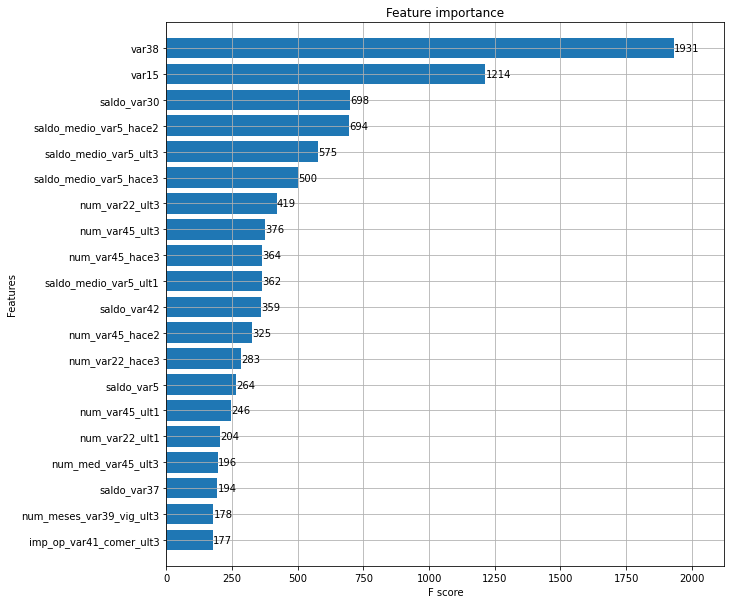

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.8)

In [37]:
# LightGBM model learning and hyperparameter tuning
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=500, n_jobs=-1)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.808132	valid_0's binary_logloss: 0.158967
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.815326	valid_0's binary_logloss: 0.154059
[3]	valid_0's auc: 0.817202	valid_0's binary_logloss: 0.150758
[4]	valid_0's auc: 0.82071	valid_0's binary_logloss: 0.148238
[5]	valid_0's auc: 0.823531	valid_0's binary_logloss: 0.146083
[6]	valid_0's auc: 0.824134	valid_0's binary_logloss: 0.144425
[7]	valid_0's auc: 0.824515	valid_0's binary_logloss: 0.14304
[8]	valid_0's auc: 0.824809	valid_0's binary_logloss: 0.141966
[9]	valid_0's auc: 0.8249	valid_0's binary_logloss: 0.141076
[10]	valid_0's auc: 0.824486	valid_0's binary_logloss: 0.140373
[11]	valid_0's auc: 0.82483	valid_0's binary_logloss: 0.139695
[12]	valid_0's auc: 0.824799	valid_0's binary_logloss: 0.13918
[13]	valid_0's auc: 0.825749	valid_0's binary_logloss: 0.138642
[14]	valid_0's auc: 0.825781	valid_0's binary_logloss: 0.138242
[15]	valid_0's auc: 0.825733	valid_0's binary_logloss: 0.

In [41]:
from sklearn.model_selection import GridSearchCV
import time

start = time.time()
# In order to increase speed, better to decrease the n_estimator to 100
lgbm_clf = LGBMClassifier(n_estimators=200, n_jobs=-1)
params = {'num_leaves': [32, 64],
          'max_depth': [128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV best parameters:', gridcv.best_params_)
lgbm_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_score))
print('Elapsed time: {0}s'.format(time.time()-start))

[1]	valid_0's auc: 0.823839	valid_0's binary_logloss: 0.157892	valid_1's auc: 0.813343	valid_1's binary_logloss: 0.158833
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830438	valid_0's binary_logloss: 0.152549	valid_1's auc: 0.816061	valid_1's binary_logloss: 0.154043
[3]	valid_0's auc: 0.835649	valid_0's binary_logloss: 0.148633	valid_1's auc: 0.824786	valid_1's binary_logloss: 0.150396
[4]	valid_0's auc: 0.840996	valid_0's binary_logloss: 0.145564	valid_1's auc: 0.824839	valid_1's binary_logloss: 0.147819
[5]	valid_0's auc: 0.846688	valid_0's binary_logloss: 0.142966	valid_1's auc: 0.829394	valid_1's binary_logloss: 0.145603
[6]	valid_0's auc: 0.849656	valid_0's binary_logloss: 0.140841	valid_1's auc: 0.829685	valid_1's binary_logloss: 0.143876
[7]	valid_0's auc: 0.852191	valid_0's binary_logloss: 0.139086	valid_1's auc: 0.830914	valid_1's binary_logloss: 0.142471
[8]	valid_0's auc: 0.853232	valid_0's binary_logloss: 0.137613	valid_1's auc: 0.83063

In [44]:
# using best parameters, do main estimation
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, subsample=0.8, min_child_samples=60, max_depth=128)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC_AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.812001	valid_0's binary_logloss: 0.158649
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.82265	valid_0's binary_logloss: 0.153453
[3]	valid_0's auc: 0.823853	valid_0's binary_logloss: 0.150086
[4]	valid_0's auc: 0.82744	valid_0's binary_logloss: 0.147336
[5]	valid_0's auc: 0.827291	valid_0's binary_logloss: 0.145318
[6]	valid_0's auc: 0.828198	valid_0's binary_logloss: 0.143754
[7]	valid_0's auc: 0.827969	valid_0's binary_logloss: 0.142483
[8]	valid_0's auc: 0.827183	valid_0's binary_logloss: 0.141379
[9]	valid_0's auc: 0.827153	valid_0's binary_logloss: 0.140494
[10]	valid_0's auc: 0.82731	valid_0's binary_logloss: 0.139785
[11]	valid_0's auc: 0.826551	valid_0's binary_logloss: 0.139261
[12]	valid_0's auc: 0.826286	valid_0's binary_logloss: 0.138671
[13]	valid_0's auc: 0.826339	valid_0's binary_logloss: 0.138323
[14]	valid_0's auc: 0.826467	valid_0's binary_logloss: 0.137944
[15]	valid_0's auc: 0.827244	valid_0's binary_logloss: